# Job posting Classification : Real/Fake

#### About Dataset : 
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. A small proportion of these descriptions are fake or scam which can be identified by the column "fraudulent". This dataset is used to create classification model which can learn the job descriptions which are fraudulent.


#### Dataset Description:

- **job_id** : Identification number given to each job posting
- **title** : A name that describes the position or job
- **location** : Information about where the job is located
- **department** : Information about the department this job is offered by
- **salary_range** : Expected salary range
- **company_profile** : Information about the company
- **description** : A brief description about the position offered
- **requirements** : Pre-requisites to qualify for the job
- **benefits** : Benefits provided by the job
- **telecommuting** : Is work from home or remote work allowed
- **has_company_logo** : Does the job posting have a company logo
- **has_questions** : Does the job posting have any questions
- **employment_type** : 5 categories – Full-time, part-time, contract, temporary and other
- **required_experience** : Can be – Internship, Entry Level, Associate, Mid-senior level, Director, Executive or Not Applicable
- **required_education** : Can be – Bachelor’s degree, high school degree, unspecified, associate degree, master’s degree, certification, some college coursework, professional, some high school coursework, vocational
- **Industry** : The industry the job posting is relevant to
- **Function** : The umbrella term to determining a job’s functionality
- **Fraudulent** : The target variable if 0: Real, 1: Fake


In [1]:
# importing neccessary dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import re
import nltk
import spacy
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report

In [2]:
#importing the dataset
data = pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Descriptive Statistics

In [3]:
data.shape

(17880, 18)

In [4]:
data.drop(['job_id'],axis=1,inplace=True)

In [5]:
data.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [7]:
data.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [8]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [9]:
data.nunique()

title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [10]:
data['fraudulent'].value_counts()           #Imbalanced dataset

0    17014
1      866
Name: fraudulent, dtype: int64

## Check for missing values, outliers and duplicated values

In [11]:
#Check for number of null values
data.isna().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
#Check for number of null values in percentages
round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False)

salary_range           83.96
department             64.58
required_education     45.33
benefits               40.32
required_experience    39.43
function               36.10
industry               27.42
employment_type        19.41
company_profile        18.50
requirements           15.07
location                1.94
description             0.01
title                   0.00
telecommuting           0.00
has_questions           0.00
has_company_logo        0.00
fraudulent              0.00
dtype: float64

In [13]:
#dropping unneccessary columns which has more than 50% missing data
data.drop(["salary_range",'department', 'location'],axis=1,inplace=True)

In [14]:
#relacing missing values
text_data = data.select_dtypes(include="object")
text_col = text_data.columns
text_col

Index(['title', 'company_profile', 'description', 'requirements', 'benefits',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function'],
      dtype='object')

In [15]:
#As text_col contains missing data replace them with empty string
data[text_col] = data[text_col].replace(np.nan," ")

In [16]:
data.isna().sum()

title                  0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<AxesSubplot:>

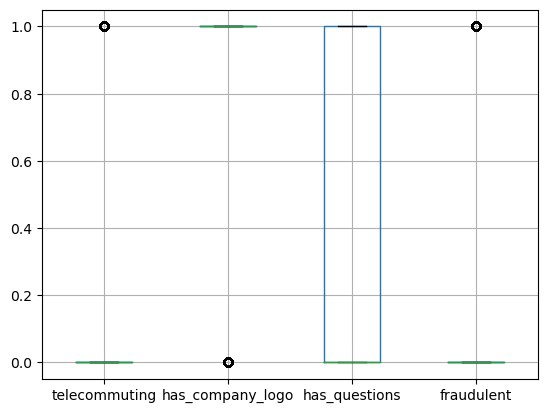

In [17]:
data.boxplot()

- no outliers present

In [18]:
#Check if any duplicate rows in dataset
data.duplicated().sum()

1649

In [19]:
data.loc[data.duplicated(),:]

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
40,English Teacher Abroad,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,,Bachelor's Degree,Education Management,,0
48,English Teacher Abroad,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,,Bachelor's Degree,Education Management,,0
80,English Teacher Abroad,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,,Bachelor's Degree,Education Management,,0
89,English Teacher Abroad,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,,Bachelor's Degree,Education Management,,0
99,English Teacher Abroad,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,,Bachelor's Degree,Education Management,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,Data Entry Admin/Clerical Positions - Work Fro...,,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,,,0,0,0,,,,,,1
17813,Customer Service Representative,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17833,Web Designer,,We’re looking for a web designer with a passio...,What skills are we looking for?English-speakin...,,1,1,1,,,,,,0
17847,User Support Technician,Outstanding Member Service Starts With Outstan...,Perform basic workstation trouble analysis to ...,Strong organizational and analytical skillsAbi...,"Medical, dental and vision insurance401(k) Re...",0,1,1,Full-time,Associate,High School or equivalent,Information Technology and Services,Information Technology,0


In [20]:
#drop the duplicate values
data.drop_duplicates(inplace=True)

## Exploratory Data Analysis

In [21]:
data['fraudulent'].value_counts()   # dataset is imbalanced

0    15490
1      741
Name: fraudulent, dtype: int64

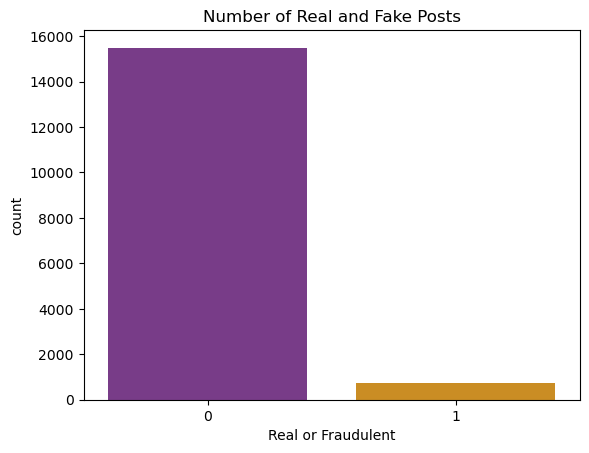

In [22]:
sns.countplot(x='fraudulent',data=data, palette='CMRmap')
plt.title("Number of Real and Fake Posts")
plt.xlabel('Real or Fraudulent')
plt.show() 

- Dataset is highly imbalanced

In an imbalanced dataset, one or more classes are represented by a significantly smaller number of instances compared to other classes. This can create challenges when training machine learning models because the model may become biased towards the majority class, leading to poor performance on the minority class(es).

To address this issue, various techniques can be employed, such as oversampling the minority class, undersampling the majority class, or using more advanced methods like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class. These techniques aim to balance the representation of classes in the dataset and improve the model's ability to learn from all classes effectively.

In [23]:
data['title'].value_counts()

Customer Service Associate                                     139
Software Engineer                                               78
Account Manager                                                 73
Customer Service Associate - Part Time                          72
Web Developer                                                   65
                                                              ... 
Field Service Tech Capital Equipment    1970                     1
Business Development Associate, France- Berlin, Deutschland      1
BUSINESS DEVELOPMENT ASSOCIATE, SCANDINAVIA                      1
Emergency Operations Technology Specialist                       1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [24]:
data.title = data.title.str.strip()
data['title'].value_counts()

Customer Service Associate                                     189
Customer Service Associate - Part Time                          85
Software Engineer                                               82
Account Manager                                                 79
Project Manager                                                 69
                                                              ... 
Apartment Community Service Manager                              1
Digital Marketing Intern (6-months)                              1
Senior PPC Specialist                                            1
Project Manager New Product Introduction Aerospace               1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64

In [25]:
title = data.title.value_counts()[:5]

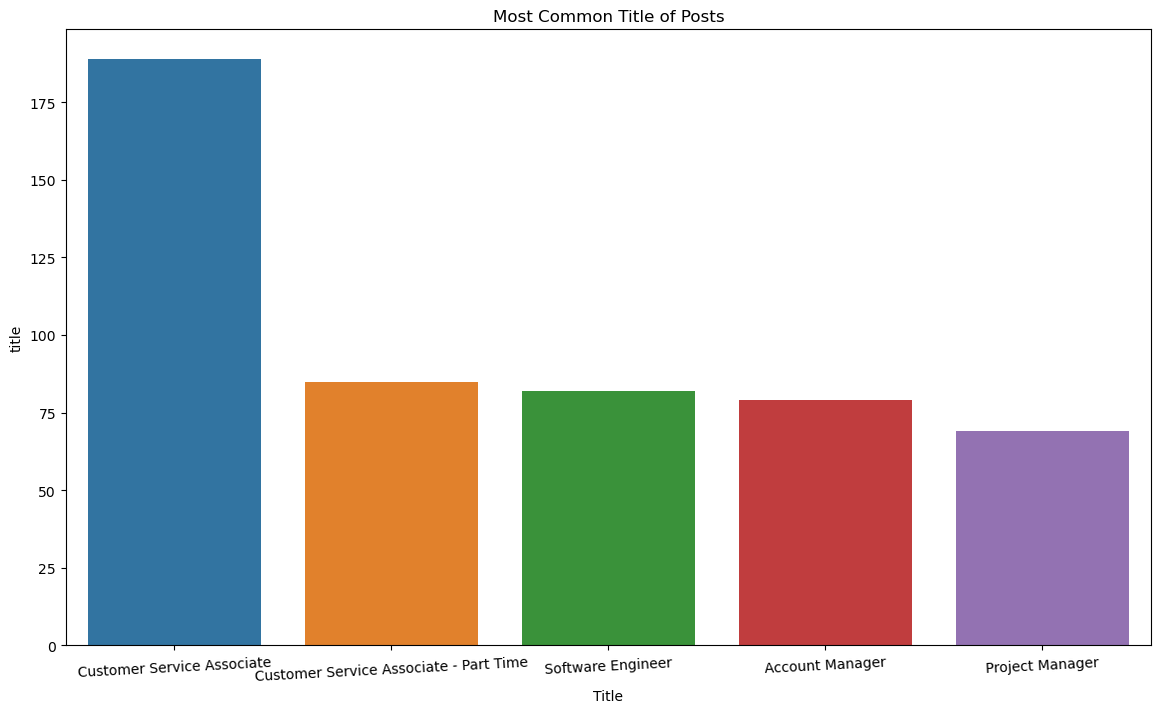

In [26]:
plt.figure(figsize = (14,8))
sns.barplot(x = title.index, y = title )
plt.title("Most Common Title of Posts")
plt.xlabel("Title")
plt.xticks(rotation=3)
plt.show()

- Most common title of posts found in job postings is English Teacher Abroad.

In [27]:
data['telecommuting'].value_counts()

0    15539
1      692
Name: telecommuting, dtype: int64

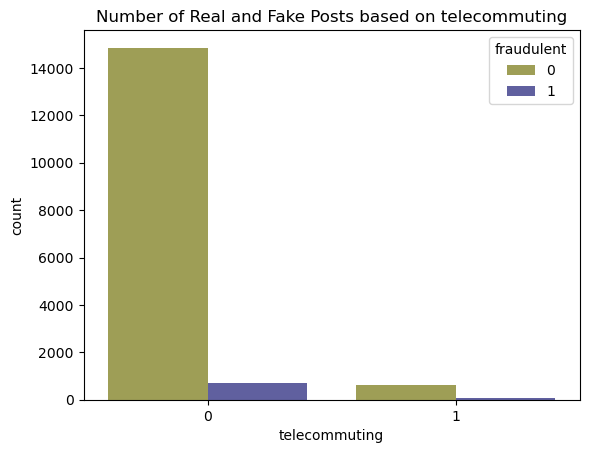

In [28]:
sns.countplot(x = "telecommuting", hue = "fraudulent", data = data, palette = 'gist_stern_r')
plt.title("Number of Real and Fake Posts based on telecommuting")
plt.show()

- When there is no telecommunication chance of job postings to be fake is greater.

In [29]:
data['has_company_logo'].value_counts()

1    12928
0     3303
Name: has_company_logo, dtype: int64

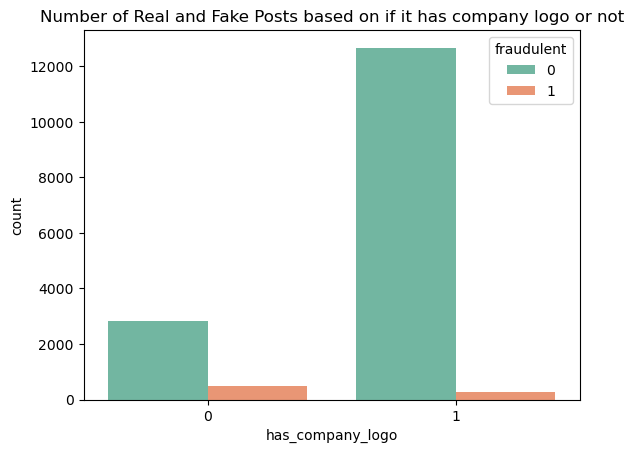

In [30]:
plt.title("Number of Real and Fake Posts based on if it has company logo or not")
sns.countplot(x = "has_company_logo", hue = "fraudulent",data = data, palette = 'Set2' )
plt.show()

- If company logo is present often it is a real job and chances for the postings to be fake is higher if logo is absent.

In [31]:
data['has_questions'].value_counts()

0    8336
1    7895
Name: has_questions, dtype: int64

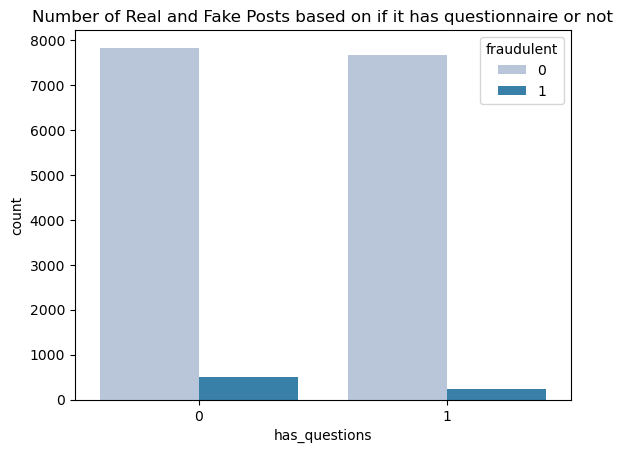

In [32]:
plt.title("Number of Real and Fake Posts based on if it has questionnaire or not")
sns.countplot(x = "has_questions", hue = "fraudulent",data = data, palette = 'PuBu')
plt.show()

- If job postings has no questionnaire present, its more likely to be fake.

In [33]:
data['employment_type'].value_counts()

Full-time    10932
              3246
Contract       829
Part-time      767
Temporary      235
Other          222
Name: employment_type, dtype: int64

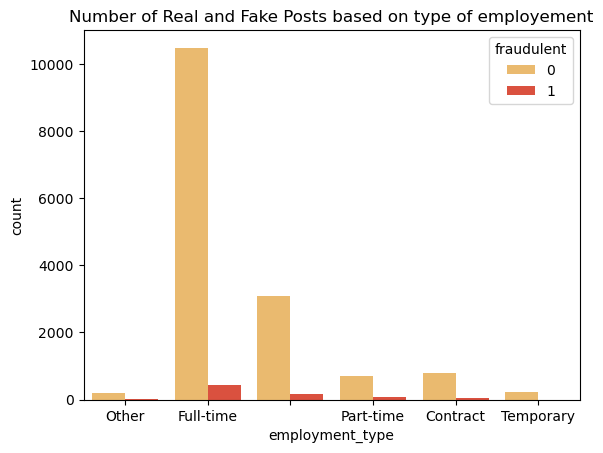

In [34]:
plt.title("Number of Real and Fake Posts based on type of employement")
sns.countplot(x = "employment_type", hue = "fraudulent", data = data, palette = 'YlOrRd')
plt.show()

- Comparatively full-time type of employment has higher no. of fake jobs.

In [35]:
data['required_experience'].value_counts()

                    6037
Mid-Senior level    3707
Entry level         2341
Associate           2223
Not Applicable      1041
Internship           371
Director             371
Executive            140
Name: required_experience, dtype: int64

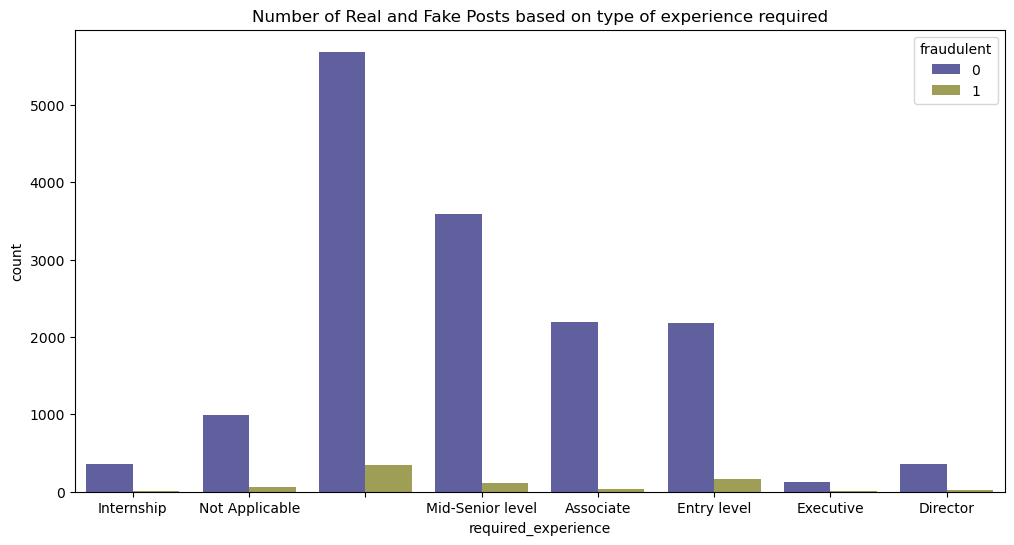

In [36]:
plt.figure(figsize=(12,6))
plt.title("Number of Real and Fake Posts based on type of experience required")
sns.countplot(x = "required_experience",hue = "fraudulent", data = data, palette = 'gist_stern')
plt.show()

In [37]:
data['required_education'].value_counts()

                                     7538
Bachelor's Degree                    4379
High School or equivalent            1856
Unspecified                          1338
Master's Degree                       415
Associate Degree                      257
Certification                         160
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

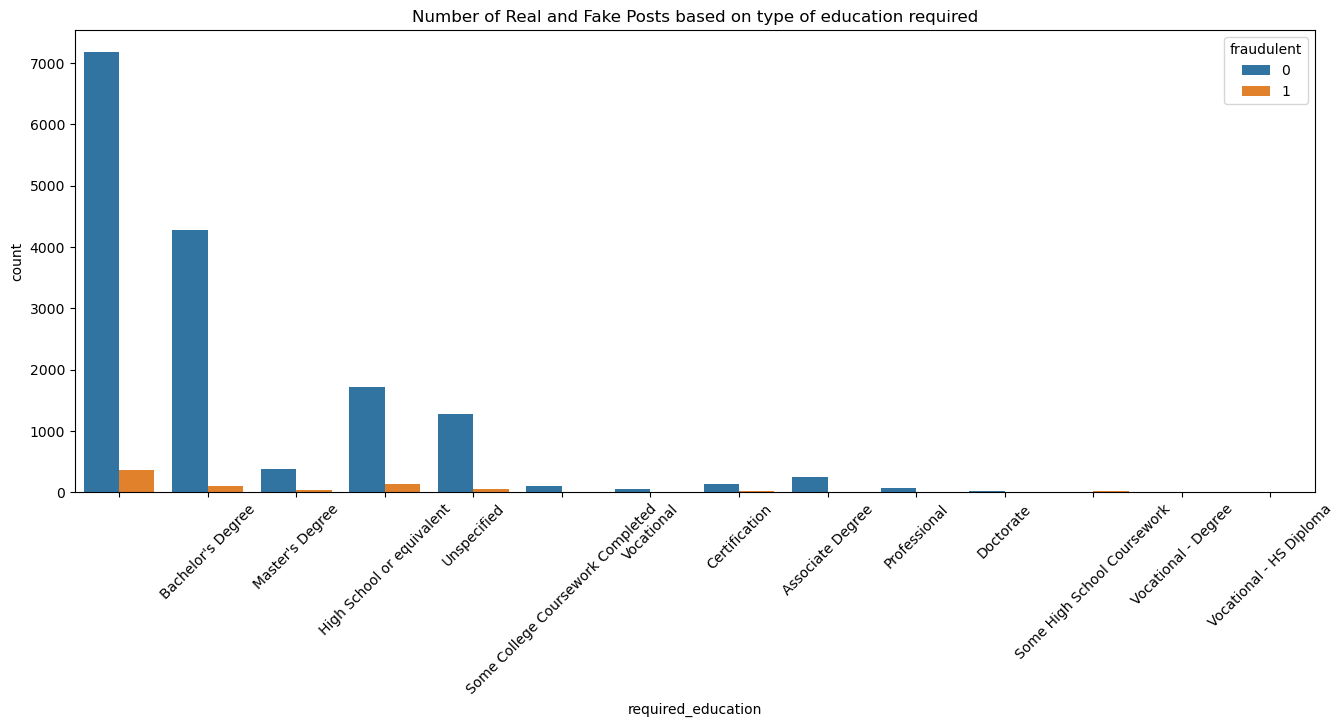

In [38]:
plt.figure(figsize = (16,6))
plt.title("Number of Real and Fake Posts based on type of education required")
sns.countplot(x = "required_education", hue = "fraudulent", data = data)
plt.xticks(rotation=45)
plt.show()

- If experience required or education required is not specified chance for job posting to be fake is greater.

In [39]:
data['industry'].value_counts()

                                       4558
Information Technology and Services    1671
Computer Software                      1325
Internet                               1046
Marketing and Advertising               791
                                       ... 
Wine and Spirits                          1
Sporting Goods                            1
Shipbuilding                              1
Alternative Dispute Resolution            1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

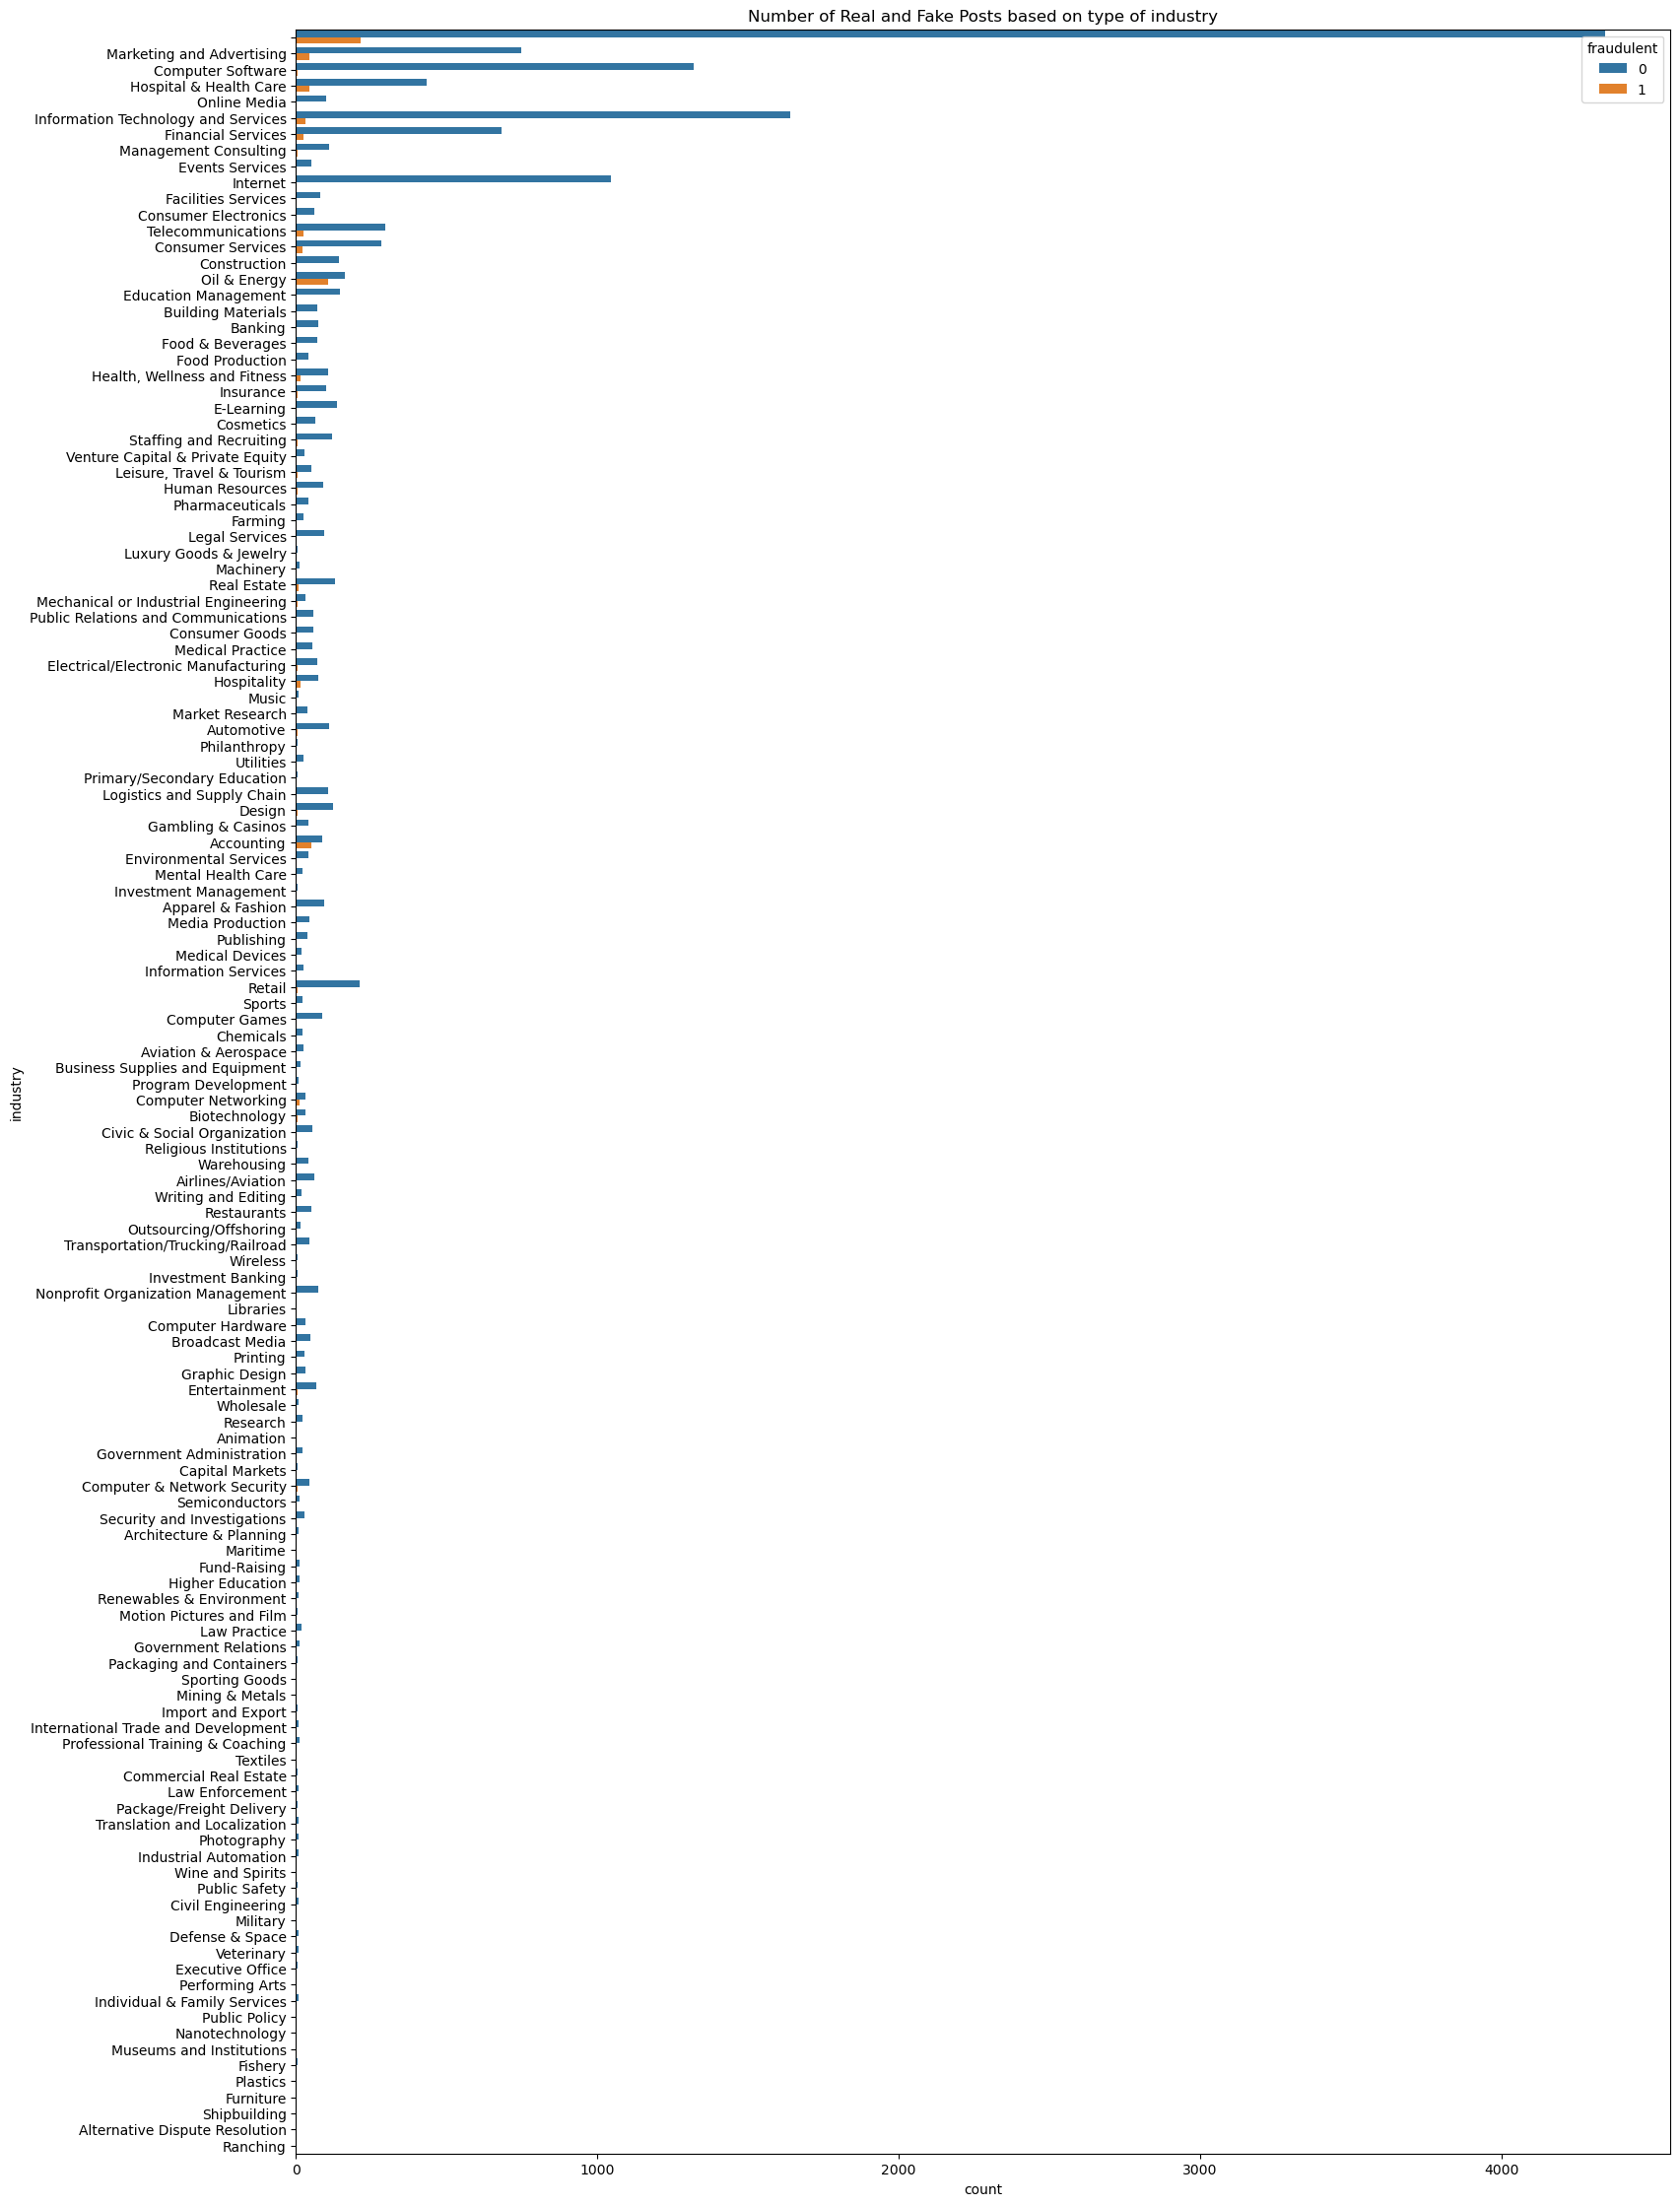

In [40]:
plt.figure(figsize=(18,28))
plt.title("Number of Real and Fake Posts based on type of industry")
sns.countplot(y = 'industry', hue = "fraudulent", data = data)
plt.show()

In [41]:
data['function'].value_counts()

                          5500
Information Technology    1723
Sales                     1354
Engineering               1321
Customer Service          1107
Marketing                  805
Administrative             600
Design                     335
Health Care Provider       322
Other                      313
Management                 298
Accounting/Auditing        209
Business Development       203
Human Resources            195
Project Management         182
Finance                    160
Writing/Editing            131
Art/Creative               131
Consulting                 130
Education                  120
Production                 113
Product Management         112
Quality Assurance          110
Advertising                 89
Business Analyst            83
Data Analyst                82
Public Relations            76
Manufacturing               73
General Business            67
Research                    50
Strategy/Planning           46
Legal                       41
Training

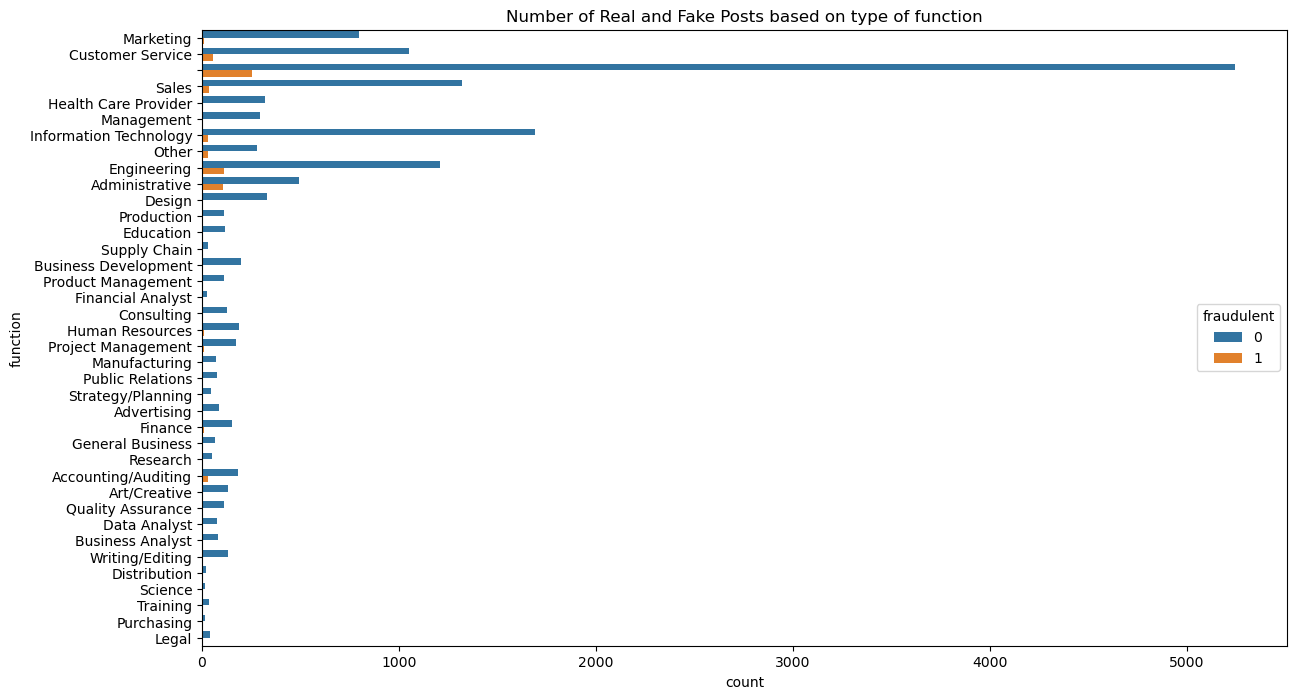

In [42]:
plt.figure(figsize=(14,8))
plt.title("Number of Real and Fake Posts based on type of function")
sns.countplot(y = 'function', hue = "fraudulent", data = data)
plt.show()

- If type of function or type of industry is not specified chance for job posting to be fake is greater.

In [43]:
# Creating new feature "text", containing all the textual information provided in job ads
data['text'] = data['title']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']

In [44]:
data["text"].iloc[0]

"Marketing Intern We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and cu

In [45]:
data['text_len'] = data['text'].str.len()

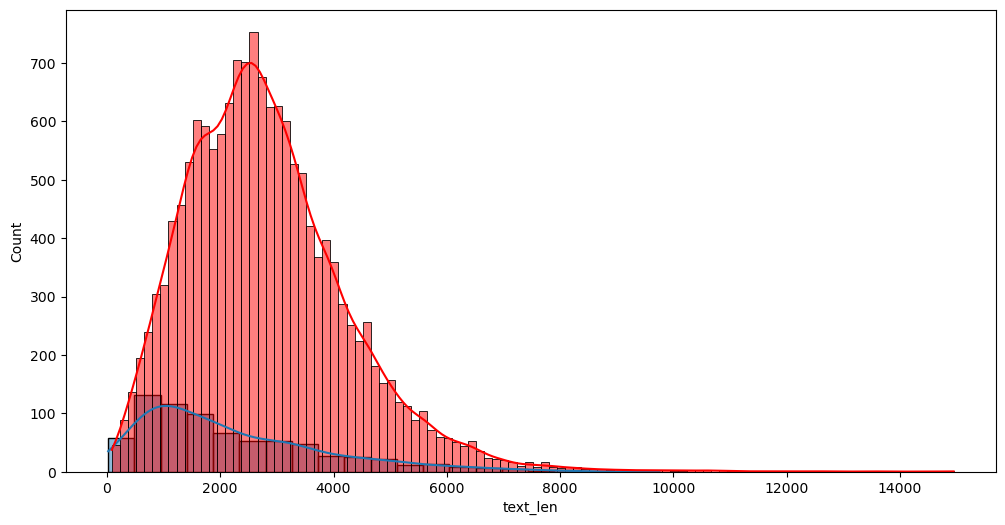

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(x=data[data["fraudulent"]==1]["text_len"],kde=True)
sns.histplot(x=data[data["fraudulent"]==0]["text_len"],kde=True,color="red")
plt.show()

- Fake job postings have less information than real job postings

In [47]:
corr = data.corr()

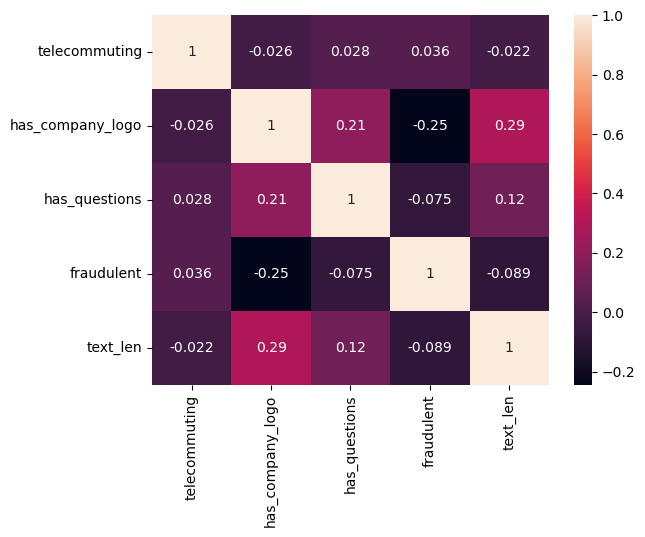

In [48]:
sns.heatmap(corr,annot=True)
plt.show()

- We see has_company_logo is slightly negatively correlated with fradulent (our target).

### Key findings from EDA
- Dataset is highly imbalanced with 16702 (95%of jobs) being real and only 840 (5%of jobs) being fake.
- When there is no telecommunication chance of fake job postings is greater.
- has_company_logo is negatively correlated with dependent feature. i.e, if company logo is present often
  it is a real job post. 
- If job postings has no questionnaire present, its more likely to be fake.
- Comparatively full-time type of employment has higher no. of fake jobs.
- If experience required or education required and type of function or type of industry is not specified chance for job posting to be fake is greater.
- Most common title of posts found in job postings is English Teacher Abroad.
- Fake job postings has less information than real job postings.

## For this project we splitted  the dataset in two ways : 
- 1. Dataset which takes up only the numerical columns or binary features and categorical columns. 
- 2. Dataset that would consider textual features only.


The main goal to convert these attributes into two forms is to classify fraudulent job advertisements without doing any text processing and natural language processing. 

## In this work, we have used only the newly added feature ‘text’ and our label column.

In [49]:
data.head()

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text,text_len
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern We're Food52, and we've creat...",2663
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production 90 S...,6133
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,Commissioning Machinery Assistant (CMA) Valor ...,2641
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC Our passion ...,5462
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager SpotSource Solutions LLC i...,3949


In [50]:
data.shape

(16231, 16)

In [51]:
data['text']

0        Marketing Intern We're Food52, and we've creat...
1        Customer Service - Cloud Video Production 90 S...
2        Commissioning Machinery Assistant (CMA) Valor ...
3        Account Executive - Washington DC Our passion ...
4        Bill Review Manager SpotSource Solutions LLC i...
                               ...                        
17874    JavaScript Developer   Sr, JavaScript Develope...
17875    Account Director - Distribution Vend is lookin...
17876    Payroll Accountant WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer   Nemsia Studios is looking f...
Name: text, Length: 16231, dtype: object

## Lowercasing:
The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

In [52]:
data['text'] = data['text'].str.lower()

## Removal of Punctuations:
This is a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

In [53]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))     #str.maketrans() creates a translation table that maps
                                                                      #each character in PUNCT_TO_REMOVE to None,
                                                                      #effectively removing those characters from the text.

data['text'] = data['text'].apply(lambda text: remove_punctuation(text))
data['text'].head()

0    marketing intern were food52 and weve created ...
1    customer service  cloud video production 90 se...
2    commissioning machinery assistant cma valor se...
3    account executive  washington dc our passion f...
4    bill review manager spotsource solutions llc i...
Name: text, dtype: object

## Removal of Stopwords:

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis.

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [56]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: remove_stopwords(text))

## Removal of Frequent words:
we will remove the frequent words from the corpus.

In [57]:
from collections import Counter
cnt = Counter()
for text in data['text'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(100)

[('work', 32888),
 ('experience', 31274),
 ('team', 30147),
 ('business', 20175),
 ('company', 18680),
 ('new', 17125),
 ('customer', 15597),
 ('skills', 15199),
 ('management', 15042),
 ('development', 15012),
 ('sales', 14389),
 ('working', 14294),
 ('services', 13904),
 ('amp', 13574),
 ('service', 12342),
 ('people', 11847),
 ('marketing', 11645),
 ('years', 11605),
 ('looking', 11578),
 ('design', 11364),
 ('us', 11210),
 ('product', 11132),
 ('solutions', 10341),
 ('clients', 10279),
 ('time', 10090),
 ('software', 9960),
 ('data', 9839),
 ('ability', 9647),
 ('including', 9640),
 ('support', 9533),
 ('knowledge', 9516),
 ('web', 9357),
 ('technology', 9104),
 ('job', 8742),
 ('communication', 8693),
 ('help', 8557),
 ('environment', 8445),
 ('customers', 8346),
 ('provide', 8229),
 ('well', 8189),
 ('best', 7815),
 ('project', 7559),
 ('one', 7554),
 ('position', 7497),
 ('opportunity', 7482),
 ('client', 7417),
 ('quality', 7412),
 ('also', 7401),
 ('based', 7345),
 ('strong', 

In [58]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(100)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data['text'] = data['text'].apply(lambda text: remove_freqwords(text))

## Lemmatization:
Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

In [59]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data['text'] = data['text'].apply(lambda text: lemmatize_words(text))
data['text']

0        intern food52 weve created groundbreaking awar...
1        cloud video production 90 second world cloud v...
2        commissioning machinery assistant cma valor pr...
3        account executive washington dc passion improv...
4        bill review spotsource llc human capital consu...
                               ...                        
17874    javascript developer sr javascript developer 4...
17875    account director distribution vend awesome tal...
17876    payroll accountant weblinc ecommerce platform ...
17877    cost control staff engineer cost control exp t...
17878    graphic designer nemsia studio experienced vis...
Name: text, Length: 16231, dtype: object

## TF/IDF Vectorization:

In [61]:
tfidfvec = TfidfVectorizer(stop_words = "english", max_features = 500)

In [62]:
tfidf = tfidfvec.fit_transform(data['text'])

In [63]:
len(tfidfvec.vocabulary_)

500

In [64]:
print(tfidfvec.vocabulary_)

{'site': 422, 'home': 216, 'focused': 186, 'better': 46, 'way': 485, 'specific': 430, 'food': 189, 'offer': 317, 'highly': 212, 'talented': 450, 'country': 95, 'professional': 370, 'partnership': 335, 'market': 293, 'website': 486, 'york': 497, 'daily': 105, 'today': 463, 'located': 276, 'city': 64, 'community': 75, 'currently': 104, 'small': 423, 'executive': 166, 'developer': 117, 'andor': 22, 'existing': 167, 'content': 89, 'number': 315, 'partner': 334, 'various': 478, 'program': 371, 'event': 160, 'administrative': 13, 'document': 128, 'improvement': 228, 'staff': 432, 'major': 287, 'plus': 352, 'attention': 38, 'responsibility': 397, 'big': 47, 'drive': 130, 'startup': 436, 'long': 279, 'hour': 217, 'cloud': 66, 'video': 482, 'production': 368, 'world': 493, 'brand': 49, 'agency': 15, 'fast': 175, 'cost': 94, 'issue': 253, 'managing': 291, 'aspect': 33, 'network': 314, 'dedicated': 109, 'success': 444, 'team': 453, 'provides': 375, '100': 1, '30': 2, 'largest': 261, 'office': 319

## Splitting of independent and dependent features:

In [65]:
x = pd.DataFrame(tfidf.todense())
x.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.278019,0.0,0.0
1,0.0,0.051855,0.050689,0.000000,0.0,0.022092,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.154715,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.339961,...,0.0,0.094954,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.126695,0.0,0.563111,0.0,0.056077,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.040847,0.046326,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.071009,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [66]:
y = data["fraudulent"]

In [67]:
# Perform 80 : 20 Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=134, stratify=y)

# Model Building and Evaluation:

## 1. Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)

In [70]:
y_pred = lr_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9624268555589776

In [71]:
precision_score(y_test,y_pred)

0.8421052631578947

In [72]:
recall_score(y_test,y_pred)

0.21621621621621623

In [73]:
f1_score(y_test,y_pred)

0.34408602150537637

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3099
           1       0.84      0.22      0.34       148

    accuracy                           0.96      3247
   macro avg       0.90      0.61      0.66      3247
weighted avg       0.96      0.96      0.95      3247



In [75]:
confusion_matrix(y_test,y_pred)

array([[3093,    6],
       [ 116,   32]], dtype=int64)

## 2. KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
lst_acc=[]
neighbors = np.arange(5,15,2)
for i in neighbors:    # 2 inside means takes values 5,7,9,.....
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    lst_acc.append(acc)
lst_acc

[0.927317523868186,
 0.9421004003695719,
 0.9698182938096704,
 0.9692023406221127,
 0.9682784108407761]

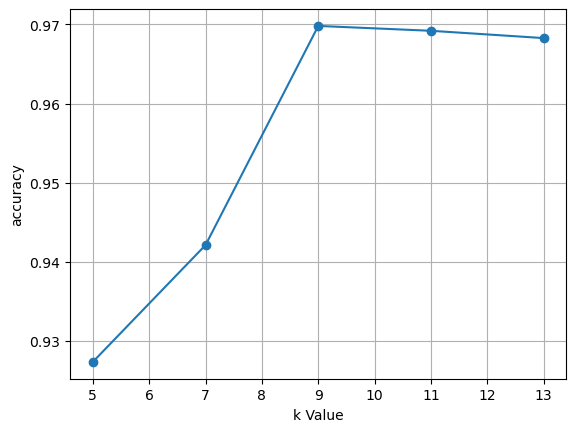

In [77]:
plt.plot(neighbors,lst_acc,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=9)
knn_model = knn.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9698182938096704


In [79]:
precision_score(y_test, y_pred)

0.8472222222222222

In [80]:
recall_score(y_test, y_pred)

0.41216216216216217

In [81]:
f1_score(y_test,y_pred)

0.5545454545454546

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3099
           1       0.85      0.41      0.55       148

    accuracy                           0.97      3247
   macro avg       0.91      0.70      0.77      3247
weighted avg       0.97      0.97      0.96      3247



## 3. SVC

In [83]:
from sklearn.svm import SVC
svc = SVC(kernel='linear') 
svc_model = svc.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9676624576532183


In [84]:
precision_score(y_test,y_pred)

0.9215686274509803

In [85]:
recall_score(y_test,y_pred)

0.31756756756756754

In [86]:
f1_score(y_test,y_pred)

0.4723618090452262

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3099
           1       0.92      0.32      0.47       148

    accuracy                           0.97      3247
   macro avg       0.94      0.66      0.73      3247
weighted avg       0.97      0.97      0.96      3247



## 4. Desicion Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.95903911302741


In [89]:
precision_score(y_test,y_pred)

1.0

In [90]:
recall_score(y_test,y_pred)

0.10135135135135136

In [91]:
f1_score(y_test,y_pred)

0.18404907975460125

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3099
           1       1.00      0.10      0.18       148

    accuracy                           0.96      3247
   macro avg       0.98      0.55      0.58      3247
weighted avg       0.96      0.96      0.94      3247



## 5. Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9738219895287958


In [94]:
precision_score(y_test,y_pred)

0.9701492537313433

In [95]:
recall_score(y_test,y_pred)

0.4391891891891892

In [96]:
f1_score(y_test,y_pred)

0.6046511627906977

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3099
           1       0.97      0.44      0.60       148

    accuracy                           0.97      3247
   macro avg       0.97      0.72      0.80      3247
weighted avg       0.97      0.97      0.97      3247



## 6. Gradient Boosting Classifier:

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the gradient boosting classifier model
gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model = gb.fit(x_train, y_train)

y_pred = gb_model.predict(x_test)

print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9667385278718817


In [99]:
precision_score(y_test,y_pred)

0.9347826086956522

In [100]:
recall_score(y_test,y_pred)

0.2905405405405405

In [101]:
f1_score(y_test,y_pred)

0.44329896907216493

In [102]:
# summarize the fit of the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3099
           1       0.93      0.29      0.44       148

    accuracy                           0.97      3247
   macro avg       0.95      0.64      0.71      3247
weighted avg       0.97      0.97      0.96      3247



In [103]:
print(confusion_matrix(y_test,y_pred))

[[3096    3]
 [ 105   43]]


## 7. Naive Bayes 

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
naivebayes = GaussianNB()
naivebayes.fit(x_train, y_train)
y_pred = naivebayes.predict(x_test)
accuracy_score(y_test, y_pred)

0.796735448105944

In [106]:
precision_score(y_test, y_pred)

0.15217391304347827

In [107]:
recall_score(y_test, y_pred)

0.7567567567567568

In [108]:
f1_score(y_test, y_pred)

0.25339366515837103

In [109]:
print(confusion_matrix(y_test,y_pred))

[[2475  624]
 [  36  112]]


# Cross Validation:

###  StratifiedKFold

In [110]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import make_scorer

# Define the StratifiedKFold cross-validator
skfold_validator = StratifiedKFold(n_splits=10)

# Specify the scoring metric as F1 score
scoring_metric = make_scorer(f1_score)

In [112]:
# Perform cross-validation and compute F1 score
skcv_result = cross_val_score(lr_model, x, y, cv=skfold_validator, scoring=scoring_metric)
skcv_result

array([0.48543689, 0.31578947, 0.17073171, 0.13953488, 0.37113402,
       0.29885057, 0.4       , 0.31818182, 0.40425532, 0.33684211])

In [113]:
np.mean(skcv_result)

0.32407567958512107

In [114]:
#knn
skcv_result = cross_val_score(knn_model, x, y, cv=skfold_validator, scoring=scoring_metric)
skcv_result

array([0.43589744, 0.31746032, 0.34599156, 0.36363636, 0.66115702,
       0.57142857, 0.53703704, 0.41860465, 0.39053254, 0.41666667])

In [115]:
np.mean(skcv_result)

0.44584121736427046

In [116]:
#svc
skcv_result = cross_val_score(svc_model, x, y, cv=skfold_validator, scoring=scoring_metric)
skcv_result

array([0.63793103, 0.33684211, 0.29545455, 0.23655914, 0.4950495 ,
       0.46938776, 0.50980392, 0.41237113, 0.37894737, 0.42424242])

In [117]:
np.mean(skcv_result)

0.4196588933290667

In [118]:
#dt
skcv_result = cross_val_score(dt_model, x, y, cv=skfold_validator, scoring=scoring_metric)
skcv_result

array([0.02531646, 0.09195402, 0.02666667, 0.05263158, 0.31111111,
       0.07407407, 0.31460674, 0.17073171, 0.17073171, 0.15      ])

In [119]:
np.mean(skcv_result)

0.13878240656911084

In [120]:
#rf
skcv_result = cross_val_score(rf_model, x, y, cv=skfold_validator, scoring=scoring_metric)
skcv_result

array([0.59259259, 0.46464646, 0.44444444, 0.48484848, 0.60377358,
       0.59813084, 0.60377358, 0.54368932, 0.54901961, 0.45360825])

In [121]:
np.mean(skcv_result)

0.533852717311897

In [122]:
#nb
skcv_result = cross_val_score(naivebayes, x, y, cv=skfold_validator, scoring=scoring_metric)
skcv_result

array([0.27539503, 0.26086957, 0.22650602, 0.25742574, 0.29383886,
       0.25806452, 0.3012987 , 0.30690537, 0.29468599, 0.25      ])

In [123]:
np.mean(skcv_result)

0.27249898069172085

### Creating pickle file for Model Deployment

In [186]:
## random forest is the best model

In [124]:
rf1 = RandomForestClassifier()
rf1.fit(x,y)

RandomForestClassifier()

In [125]:
import pickle

In [126]:
pickle.dump(rf1,open("job_posting_NLP.pkl","wb"))

## Checking if model works

In [133]:
rf_model.predict(x.iloc[158:160,:])

array([0, 1], dtype=int64)

In [134]:
rf1.predict(x.iloc[158:160,:])

array([0, 1], dtype=int64)

In [135]:
test1=x.iloc[158:160,:]

In [136]:
test1.to_csv('test1.csv',index = False)

In [138]:
tst1=pd.read_csv('C:/Users/Mohan/Downloads/test1.csv')
# Loading up the Classification model we created
model = pickle.load(open('C:/Users/Mohan/Downloads/job_posting_NLP.pkl','rb'))
model.predict(tst1)

array([0, 1], dtype=int64)